<a href="https://colab.research.google.com/github/sheinviktoriia/Data-analyst-home-works-/blob/main/HW_4_5_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PythonforDA/data/yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

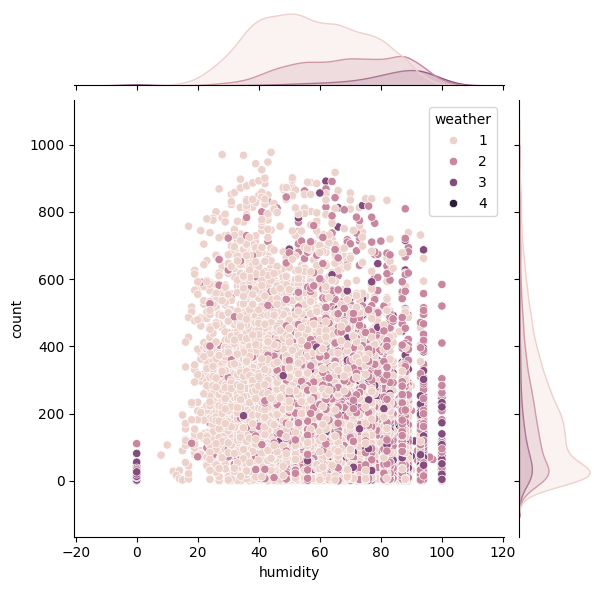

In [4]:
sns.jointplot(data=df, x="humidity", y="count", hue="weather");

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

1. За ясної, мало хмарної чи частково хмарної погоди і сереньої вологості клієнтів більше, ніж за вищої вологості і гірших погодніх умов, що загалом закономірно.Половина усіх орендованих велосипедів відбувається саме за таких умов.
2. Зі збільшенням вологості (~ <50) кількість кількість орендованих велосипедів дещо зменшується, а при дуже високій вологості - зменшується вдвічі.
3. Є невелика кількість орендованих велосипедів при нульовій вологості і поганих погодніх умовах (2, 3), вони виглядають як викид, незрозуміло чому так. Також немає даних по оренді, коли погодні умови погані (Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман). За наявності такі дані можна не включати в аналіз.

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [5]:
filtered_season = df[(df.season==1) | (df.season==2)]

<Figure size 2000x1000 with 0 Axes>

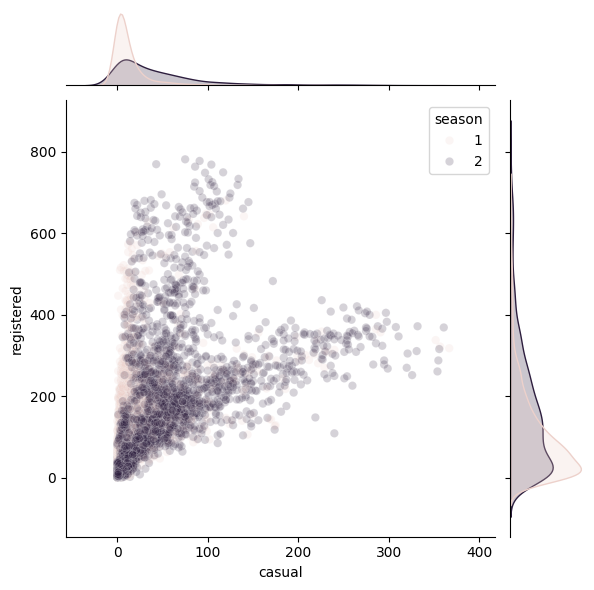

In [6]:
plt.figure(figsize=(20,10))
sns.jointplot(data=filtered_season, x="casual", y="registered", hue="season", alpha=.2);

1. Для обох типів користувачів спостерігається позитивна кореляція.
2. Влітку кількість користувачів більша для обох груп.
3. Немає чіткої залежності між зареєстрованими і незареєстрованими користувачами після позначок ~ 200 і 80 відповідно.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


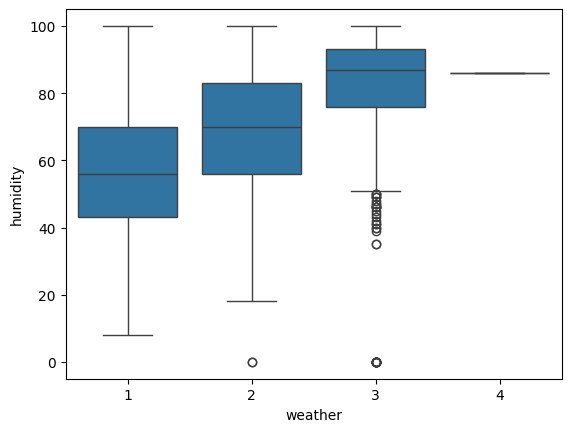

In [7]:
sns.boxplot(data=df, x="weather", y="humidity");

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [29]:
public_holiday = df[df['holiday'] == 0][['casual', 'registered', 'count', 'workingday']]


<Figure size 800x800 with 0 Axes>

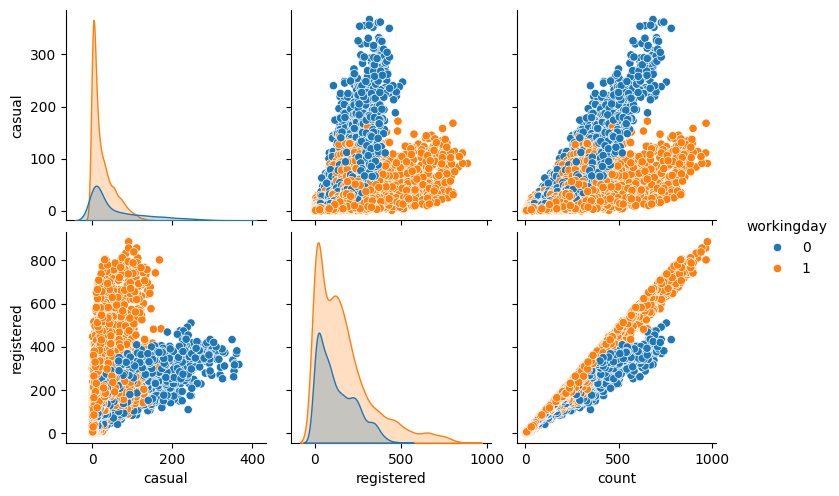

In [30]:
plt.figure(figsize=(8, 8))
sns.pairplot(data=public_holiday, hue='workingday',
             x_vars = ['casual', 'registered', 'count'],
             y_vars = ['casual', 'registered']);

1. Так, у святкові дні більше орендують велосипеди незареєстровані користувачі.
2. Кількість користувачів обох груп у робочі дні значно більша, ніж у святкові. Особливо виражено для незареєстрованих користувачів.
3. Загалом спостерігається позитивна кореляція, а отже сервіс розвивається і кількість орендованих велосипедів збільшується. Проте, для зареєстрованих користувачів цей показник більший у робочі дні, тоді як для незареєстрованих - у вихідні і святкові.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [10]:
df.datetime = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [11]:
df['date'] = df.datetime.dt.date

In [12]:
df_viz = df[['date', 'registered', 'casual']]

In [13]:
df_viz = df_viz.groupby('date').sum()

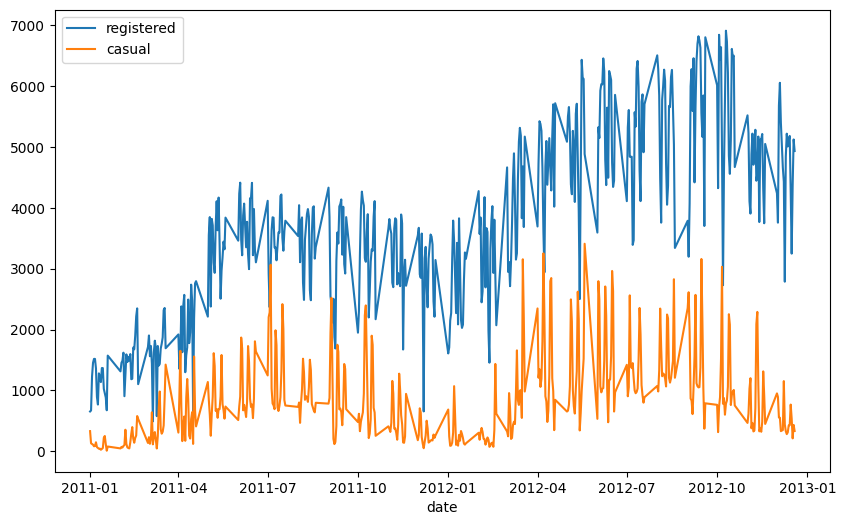

In [14]:
df_viz.plot(figsize=(10,6));

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
